### Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### Importing Data

In [2]:
data = pd.read_csv('after_clean.csv').drop(columns=['Unnamed: 0'])

### Scaling the Data With MinMax

In [3]:
temp = data[['Book_Average_Rating', 'Sale_Price', 'Sale_Rank', 'Gross_Sales']]
# Standardize the data
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(temp), columns=temp.columns)
y_scaled = x_scaled['Gross_Sales']
x_scaled = x_scaled.drop(columns=['Gross_Sales'])

temp.corr()

,Book_Average_Rating,Sale_Price,Sale_Rank,Gross_Sales
Book_Average_Rating,1.000000,-0.020990,-0.036486,-0.050240
Sale_Price,-0.020990,1.000000,0.082304,0.266899
Sale_Rank,-0.036486,0.082304,1.000000,-0.439521
Gross_Sales,-0.050240,0.266899,-0.439521,1.000000


In [4]:
temp

,Book_Average_Rating,Sale_Price,Sale_Rank,Gross_Sales
0,3.42,4.88,1,34160.00
1,4.23,1.99,2,12437.50
2,3.31,8.69,3,47795.00
3,4.04,7.50,3,41250.00
4,4.04,7.99,4,37952.50
...,...,...,...,...
973,3.52,0.99,1268,104.94
974,4.34,7.99,1270,846.94
975,3.92,7.99,1271,846.94
976,4.17,0.99,1272,104.94


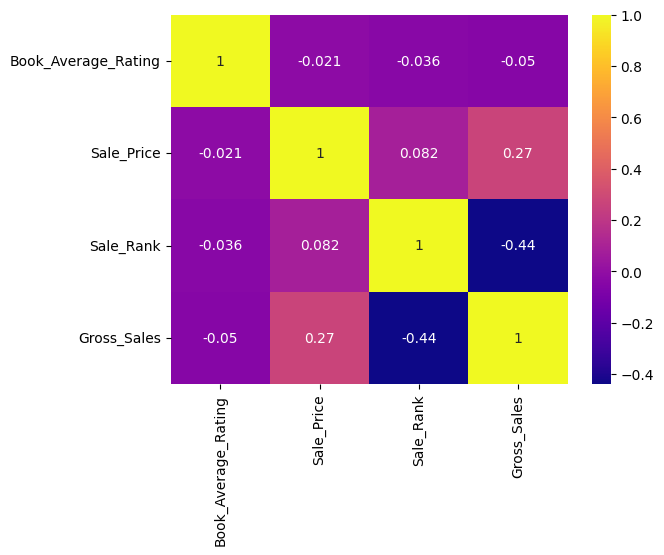

In [5]:
sns.heatmap(temp.corr(), annot=True, cmap='plasma')
plt.show()

In [6]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(x_train, y_train)

# Training
y_pred_train = model.predict(x_train)
# Calculating Metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
# Adjusted R²
p = x_train.shape[1]
n_train = len(y_train)
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

# Testing
y_pred_test = model.predict(x_test)
# Calculating Metrics for testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
# Adjusted R²
n_test = len(y_test)
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

print("Importance of the Columns:\nBook_Average_Rating {0} | Sale_Price {1} | Sale_Rank {2}".format(*model.feature_importances_))
print("Training Set: R² =", r2_train, "| Adjusted R² =", adjusted_r2_train, "| MSE =", mse_train)
print("Test Set: R² =", r2_test, "| Adjusted R² =", adjusted_r2_test, "| MSE =", mse_test)


Importance of the Columns:
Book_Average_Rating 0.01627806227722832 | Sale_Price 0.19861182083845721 | Sale_Rank 0.7851101168843145
Training Set: R² = 0.9925350667035896 | Adjusted R² = 0.9925062816137576 | MSE = 6.208578633790423e-05
Test Set: R² = 0.9836560379508418 | Adjusted R² = 0.9834006635438237 | MSE = 4.032808948697467e-05


In [7]:
ls = []
for i in temp.columns[0:-1]:
    new_value = (float(input(f'Enter {i}')) - temp[i].min()) / (temp[i].max() - temp[i].min())
    ls.append(new_value)

x = pd.DataFrame([[*ls]], columns=temp.columns[0:-1])

y_pred = model.predict(x)
y = y_pred * (temp['Gross_Sales'].max() - temp['Gross_Sales'].min()) + temp['Gross_Sales'].min()
print('Predicted Value of Sales Before Denormalization:', *y_pred)
print('Predicted Value of Sales After Denormalization', *y)

Predicted Value of Sales Before Denormalization: 0.4296992855534257
Predicted Value of Sales After Denormalization 20597.32471


In [8]:
new_value = float(input('Enter the Your Revenue Percentage\n40% Is Prefered'))
print('Your Revenues Are:', *(y * new_value))

Your Revenues Are: 8238.929884000001
